In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 1. Introduction

If you’re from a **customer-based** company, business or an organization, **customer success** is the foundation of your company. When your customer achieving their desired outcome through their interactions with your company (focus on customer success) churn will not an issue at all. But in general, churn can happen in everywhere. So what if we told you there was a way to predict, at least to some degree, how and when your customers will cancel? Or how many numbers of customers will leave you or stay at you? That’s exactly what a churn model can do. So basically customer churn is a method used to identify the numbers of customers who have either unsubscribed or cancelled their service contract.

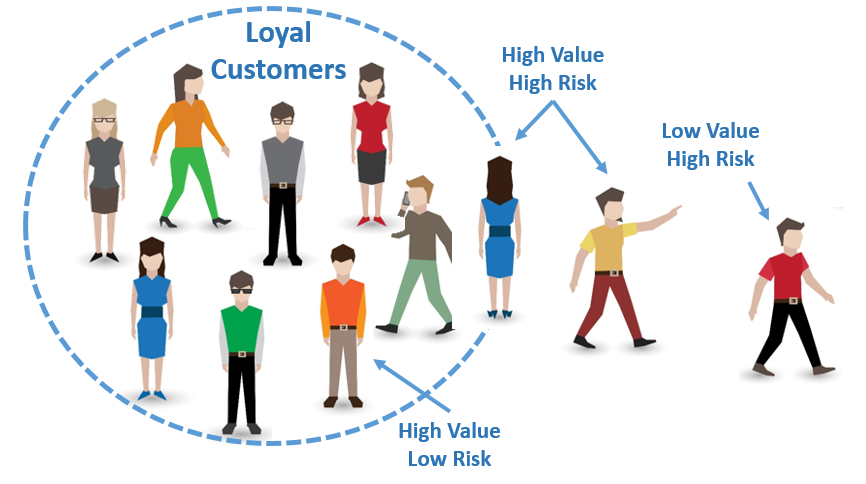

# 2. DataSet

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he/she continues to be a customer. This dataset consists of 10,000 customers (rows) and 14 columns. Here we're trying to separate customers for two particular groups based on customers personal-details and their bank details.

# 3. Objective

* Build the classification algorithm to classify customers who are left and stay.

# 4. Methodology

Since this, a type of classification problem I used supervised deep learning model called ***Artificial Neural Network (ANN)*** to classify the customers of the bank.
First of all, I carry out a data preprocessing step to get a better dataset. Then I start building the artificial neural network by splitting the dataset into train and test sets. The models' architecture will contain three layers. The first layer will have 6 neurons and use the **Relu** activation function, the second layer will also have 6 neurons and use the **Relu** activation function, and the third and the final layer will have 1 neuron with a sigmoid activation function. Then compile the model and give it the **binary_crossentopy** loss function (Used for binary classification) to measure how well the model performs on training, and then give it the Stochastic Gradient Descent **adam** optimizer to improve upon the loss. Also, I want to measure the accuracy of the model so add ‘accuracy’ to the metrics.

##### Analysis Procedure.
1.	Exploratory Data Analysis
2.	Data preprocessing
3.	Splitting the dataset
4.	Build the ANN model
5.	Make Predictions
6.	Evaluation
7.	Improve the Model
8.	Parameter Tuning



In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [ ]:
churn.head()

In [ ]:
churn.info()

In [ ]:
churn.describe()

we can see that most of the customers are around age 38 with 10000 estimated salary. According to the US Census Bureau, this salary range considered as the low-income category. 

# 4. Exploratory Data Analysis

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.countplot(churn['Geography'])

It seems like these customers are from a bank which is located in the European region. As we can see most of the customers are from France while the representatives of the equal number of customers from both Spain and Germany.

In [ ]:
sns.countplot(churn['Gender'])


This is the graph of the gender of customers. As we can see most of the customers are males.

In [ ]:
sns.distplot(churn['Age'],bins=50)
plt.title('Distribution of Age')

This graph illustrates the distribution of age of the customers. Majority of the customers in the bank are in age around 38. That means this bank has middled age customer base. It seems like there is a low percentage of an older crowd. 

In [ ]:
sns.countplot(churn['NumOfProducts'])

Most of the customers have either one or two product of the bank. This means the intention of the majority of the customers is only to maintaining a simple account or having a debit or credit card rather than the other products.

In [ ]:
sns.countplot(churn['HasCrCard'])

As we can see most of the customers have a credit card

In [ ]:
sns.countplot(churn['IsActiveMember'])

As we can see there is no significance difference among the active and non-active customers.It seems like most of the customers not happy about the bank and its services, their low-income level are maybe the reason for that. 

# 5. Data Preprocessing

Data pre-processing is an important step in the data mining process. The real-world datasets are incomplete, inconsistency and lacking certain behaviours. As a result of that, this kind of data leads to misleading results. Therefore let's carry out some data preprocessing steps to get a better dataset.

Read my 'Data Pre-processing article -[A simple introduction to Data Pre-processing](http://medium.com/analytics-vidhya/a-simple-introduction-to-data-pre-processing-4cac052df4a4)

1. Data Cleaning
2. Create Dummy Variables
3. Feature Scaling
4. Feature Transformation

## 5.1 Data Cleaning


If you're interserted to read more about Data Cleaning, read my article on   [Data Cleaning in Nutshell](https://medium.com/@duminyk95/data-cleaning-in-nutshell-4e017dd86fb6)

In [ ]:
churn.isnull().sum()

In [ ]:
churn.duplicated().sum()

This dataset has no missing values and duplicated items.

## 5.2 Create Dummy Variables


Geography, Gender is the categorical variables in this dataset. To do a proper analysis it is best practice to create dummy variables for these variables. So let’s create dummy variables.

In [ ]:
geography=pd.get_dummies(churn['Geography'],drop_first=True)
gender=pd.get_dummies(churn['Gender'],drop_first=True)

In [ ]:
churn.drop(['Geography','Gender'],axis=1,inplace=True)

In [ ]:
churn=pd.concat([churn,geography,gender],axis=1)

In [ ]:
churn.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
churn.head()

## Divide the variables into set of independent variables and single dependent variable

In [ ]:
X=churn.drop(['Exited'],axis=1).values

In [ ]:
X

In [ ]:
y=churn['Exited'].values

In [ ]:
y

X and y are numpy arrays

## Split the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5.3 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit(X_train)

## 5.4 Feature Transormation

In [ ]:
X_train=sc.transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

Now our dataset is well preprocessed and ready for the advanced analysis.

# 6 Build the ANN model

In [ ]:
# Import required models and layers and otheer important libraries
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initializing the ANN
Classifier=Sequential()

In [ ]:
# Adding layers
#input layer
Classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#hidden layers
Classifier.add(Dense(6, kernel_initializer = 'uniform',activation='relu'))
#Output layer
Classifier.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

In [ ]:
# compiling the model
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Compiling means we appying Stochastic gradient descent on the whole ANN.

In [ ]:
hist=Classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss'], loc='upper right')
plt.show()

Here we start with a very high loss during our first couple of epoch runs and then as the weight and biases start to get adjusted, we'll hopefully see the gradual drop in our loss or error. Validation loss is also going down. There are some spikes in validation loss here.Training loss and validation loss go down and then continue down together.

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper right')
plt.show()

Here we start with very low accuracy during first couple of epoch runs and then when the epoch runs increasing, the accuracy also tend increase and finally it will continue to be consistent.

# 7.Make Predictions

In [ ]:
predictions=Classifier.predict(X_test)

In [ ]:
predictions

These numbers make no sense. Our objective is to classify our customers as leave or stay. Therefore we rename our predictions,
* Predictions>0.5 = True (Customer Will leave the Bank)
* Predictions<0.5 = False (Customer Will Stay the Bank)

In [ ]:
predictions=(predictions>0.5)

In [ ]:
predictions

We made our predictions using test data where our model hasn't seen before. Now it's time to evaluate how accurate our model is.. 

# 8.Evaluating

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

Our ANN model predicts almost 84% results correctly. 

## Evaluating Model Using K-Fold Cross Validation

If we train  our ANN model twice or more than that we can notice that for each time it shows different accuracies. By using K -Fold cross_validation we're trying to train a model that will **not only be accurate** but also that should **not have too much variance of accuracy.** 

judging our model performance only on one accuracy
on one test set,
is actually not super relevant.
That's not the most relevant way,
to evaluate the model performance.
And so there is this technique called
K-Fold Cross Validation that improves this a lot.

It will fix it by splitting the training set into 10 folds
when K equals 10, and most of the time, K equals 10.
And we train our model on 9-folds
and we test it on the last remaining fold.
And since with 10-folds
we can make ten different combinations of 9-folds
to train a model and 1-fold to test it.
That means that we can train the model
and test the model on ten combinations
of training and test sets.
And that will already give us a much better idea

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

So now we have all the tools we need
and so basically we're ready to start implementing
K-fold cross validation inside Keras.
And to do this we're going to use a function
because the Keras classifier that we imported here
expects for one of its arguments a function.
It's actually its first argument we will see
called Build FN -Build Function.
And this function is simply a function
that returns the classifier that we made here
with all this architecture.
So basically this function just builds the architecture
of our artificial neural network.
So here we go.
Let's start making this function.

In [ ]:
def build_classifier():
    Classifier=Sequential()
    Classifier.add(Dense(6,activation='relu'))
    Classifier.add(Dense(6,activation='relu'))
    Classifier.add(Dense(1,activation='sigmoid'))
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return Classifier

Now we are going to wrap the whole thing.
So now what we're going to do is create a new classifier
that will be the global classifier variable
because the classifier that we define here
is a local variable because it is a variable
inside the function.
So this variable will only be created inside the function
when we execute this code here that defines the function.
Then, as soon as the function is defined
and we execute the next line of code,
well, the local classifier variable will no longer exist.
And so now what we can do is create a new classifier
that we're going to also call classifier.
And this classifier will be the same classifier
as we built here but this will not be trained on
the whole training set composed of x train and y train.
It will be built through careful cross validation
on 10 different training folds
and by each time measuring the model performance
on one test fold.
So the only thing that is different between this classifier
and the one above that we built in the previous section,
is only in the training part.

In [ ]:
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)

In [ ]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)


We're going to compute the mean of these accuracies.
So let's create a new variable mean, to take the mean of this vector of accuracies, And let's also compute the variance.
So we're going to call this variance then again we take our accuracies vector to compute it.

In [ ]:
mean=accuracies.mean()
variance=accuracies.std()

In [ ]:
mean

In [ ]:
variance

# 9. Improving the model using Dropout regularization


When your model was trained too much on the training set, that becomes much less performance on the test set. That is called overfitting. Dropout Regularization is the technique used to remove the overfitting. To avoid overfitting at each iteration of the training we add dropout layer after each existing layer in our neural network. Let's see what happen to our neural network with dropout layers.

In [ ]:
from keras.layers import Dropout

In [ ]:
Classifier=Sequential()
Classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
Classifier.add(Dropout(p=0.1))
Classifier.add(Dense(6, kernel_initializer = 'uniform',activation='relu'))
Classifier.add(Dropout(p=0.1))
Classifier.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))
Classifier.add(Dropout(p=0.1))
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 10. Parameter Tuning

we have two type of parameters.
We have the parameters that are learnt from the model
during the training and these are the weights
and we have some other parameters that stay fixed
and these parameters are called the hyper parameters.
So for example these hyper parameters
are the number of a epoch, the batch size, the optimizer
or the number of neurons in the layers.

And when we trained our artificial neural network
well, we trained it with some fixed values
of these hyper parameters. But maybe that
by taking some other values, we would get to
a better accuracy overall with careful cross validation.
And so that's what parameter tuning is all about.

It consists of finding the best values
of these hyper parameters and we are gonna do this
with a technique called grid search
that basically will test several combinations
of these values and will eventually return
the best selection, the best choice that leads
to the best accuracy with careful cross validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(6, kernel_initializer = 'uniform',activation='relu'))
    classifier.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

In [ ]:
parameters={'batch_size':[25,32],'epochs':[100,500],'optimizer':['adam','rmsprop']}

Parameter tuning consists of finding the best values of these hyperparameters and we're going to do this with a technique called **Grid Search** , that basically will test several combinations of these values and will eventually return the best selection that leads to the best accuracy

In [ ]:
grid_search = GridSearchCV(estimator =classifier,param_grid = parameters,scoring = 'accuracy',cv= 10)

In [ ]:
grid_search =grid_search.fit(X_train,y_train)

In [ ]:
best_parameters =grid_search.best_params_

In [ ]:
best_parameters

In [ ]:
best_accuracy =grid_search.best_score_

In [ ]:
best_accuracy

# 11. Conclusions

* People from France are the main customers of this bank. This is a place where middle-aged and low-income people do their transactions and get other services. Having a credit card is common to the majority of customers and most of the customers have two bank products including their credit card. Most probably the second product might be the accounts of the customers.


* ANN classify the customers with 86% model accuracy.

## Leave any comment or feedback

# Thank You !!!